<a href="https://colab.research.google.com/github/Gokul-MK/Secure-Image-Steganography/blob/main/steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy cryptography pillow

In [ ]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  36131      0 --:--:-- --:--:-- --:--:-- 36272


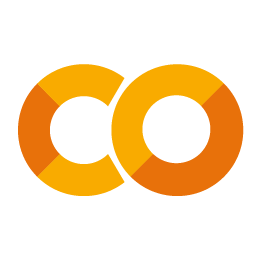

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  44847      0 --:--:-- --:--:-- --:--:-- 44891


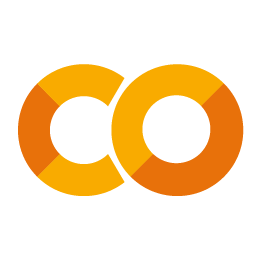

In [ ]:
# Download a sample image (Colab-compatible)
!curl -o cover_image.png https://colab.research.google.com/img/colab_favicon_256px.png

# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Colab

# Function to load and display an image
def load_and_display_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load image
    cv2_imshow(image)  # Display image (Colab-compatible)
    return image

# Load and show cover image
cover_image = load_and_display_image("cover_image.png")


In [ ]:
from cryptography.fernet import Fernet

# Generate a key for encryption
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Function to encrypt data
def encrypt_data(data):
    encrypted_data = cipher_suite.encrypt(data.encode())  # Encrypt the message
    return encrypted_data

# Function to decrypt data
def decrypt_data(encrypted_data):
    decrypted_data = cipher_suite.decrypt(encrypted_data).decode()  # Decrypt back to text
    return decrypted_data

# Example secret message
secret_message = "This is a secret!"

# Encrypt the message
encrypted_message = encrypt_data(secret_message)
print("🔒 Encrypted Message:", encrypted_message)


🔒 Encrypted Message: b'gAAAAABnvch7flOS2QfXR4Q5oC2iQRt9Un649iiDbe3dVSWf1is5j-Po6eHp-vMTHuzc4B-Z9N4Z-o-2cQhFCdsLRSc-29IiZCHad7v77KDEHWgaTjzVLuk='


In [ ]:
def encode_image(image, data):
    # Convert encrypted data to binary
    binary_data = ''.join(format(byte, '08b') for byte in data)
    data_len = len(binary_data)

    # Flatten the image array
    flat_image = image.flatten()

    # Ensure the image can hold the data
    if data_len > len(flat_image):
        raise ValueError("Data is too large to hide in the image.")

    # Modify LSBs of image pixels
    for i in range(data_len):
        flat_image[i] = (flat_image[i] & ~1) | int(binary_data[i])  # Modify LSB

    # Reshape the modified image back
    encoded_image = flat_image.reshape(image.shape)
    return encoded_image

# Encode the encrypted message in the image
stego_image = encode_image(cover_image, encrypted_message)

# Save the stego image
cv2.imwrite("stego_image.png", stego_image)
print("✅ Secret message hidden successfully!")


✅ Secret message hidden successfully!


In [ ]:
def decode_image(image, data_length):
    flat_image = image.flatten()

    # Extract LSBs to reconstruct binary data
    binary_data = ''.join(str(flat_image[i] & 1) for i in range(data_length * 8))

    # Convert binary to bytes
    extracted_bytes = bytearray(int(binary_data[i:i+8], 2) for i in range(0, len(binary_data), 8))

    return extracted_bytes

# Extract the hidden message from the stego image
extracted_data = decode_image(stego_image, len(encrypted_message))

# Decrypt the extracted message
# Convert bytearray to bytes before decrypting
decrypted_message = decrypt_data(bytes(extracted_data))

print("🔓 Decrypted Message:", decrypted_message)



🔓 Decrypted Message: This is a secret!


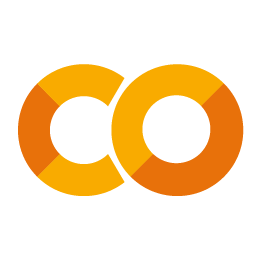

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Required for Colab

# Load and display the original image
cover_image = cv2.imread("cover_image.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(cover_image)  # Displays the original image


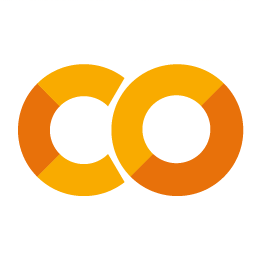

In [ ]:
# Encode the secret message into the image
stego_image = encode_image(cover_image, encrypted_message)

# Save and display the stego image
cv2.imwrite("stego_image.png", stego_image)
cv2_imshow(stego_image)  # Displays the modified image with hidden data


In [ ]:
# Extract the hidden data from the stego image
extracted_data = decode_image(stego_image, len(encrypted_message))

# Convert bytearray to bytes before decrypting
decrypted_message = decrypt_data(bytes(extracted_data))

print("🔓 Decrypted Message:", decrypted_message)


🔓 Decrypted Message: This is a secret!
